## Import

In [195]:
import pandas as pd
import numpy as np
import math
import os 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import datetime

## Data Pre-processing

In [337]:
import pandas as pd

chunksize = 100000
chunk_list = []

chunks = pd.read_json("lighter_books.json", lines=True, chunksize=chunksize)

columns_to_drop = ["isbn", "isbn13", "asin", "edition_information", "image_url", "publisher", "shelves", "description"]
for chunk in tqdm(chunks):
    chunk.drop(columns=columns_to_drop, inplace=True)
    chunk = chunk[chunk['title'].notna()]

    chunk_list.append(chunk)

books = pd.concat(chunk_list, ignore_index=True)

71it [40:24, 34.15s/it]


In [398]:
authors = pd.read_json("lighter_authors.json", lines=True)

## [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

*  You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?
*  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
*  What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
*  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


### 4.1
You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?


In [399]:
authors['name'] = authors['name'].str.lower().str.strip()
duplicate_authors = authors['name'].value_counts()
eponymous_authors = duplicate_authors[duplicate_authors > 1]


print(f"There are {eponymous_authors.shape[0]} Authors who has 2 occurances in the dataset")
for author, occur in eponymous_authors.items():
    print(author)


There are 47 Authors who has 2 occurances in the dataset
jacques mallet du pan
boris zakhoder
david  nelson
m.k. graff
type-moon
george  franklin
john  macgregor
محمد نجيب
brian
yordan yovkov
caroline miller
peter    green
peter      marshall
peter  davies
cicerón
dimitar dimov
daco
mike   lee
joseph fink
julie  campbell
martin    shaw
peter green
erin  bedford
peter king
paul graham
isabella
william messner-loebs
mac
james c.l. carson
marie-anne de la trémoille
jean-sébastien-eugène julia de fontenelle
catherine   jones
hildegard von bingen
robert w. sullivan iv
john  mole
小野不由美
james kent
malcolm macfarlane
chris lynch
christopher phillips
peter  marshall
jorge molina
jackson butch guice
katherine mercurio gotthardt
david yates
paul      davies
q. hayashida


You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

**No this is not true, there are 47 epomymous authors in the dataset.**

In [456]:
ls_unique_dfs = []
for author, occur in eponymous_authors.items():
   ls_unique_dfs.append(authors[authors['name'] == author][:1])
temp_authors = authors.drop_duplicates(subset=['name'], keep = False) 
unique_authors = pd.concat(ls_unique_dfs, ignore_index=True)
authors = pd.concat([temp_authors, unique_authors], ignore_index=True)

In [457]:
authors.shape

(351720, 12)

### 4.2

Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.


In [444]:
def author_books(author_ids):
    author_books_titles = {}
    for id in tqdm(author_ids):
        author_books_titles[id] = list(set(books[books['author_id'] == id]['title'].values))
    return author_books_titles

In [458]:
top_authors_ids = authors.sort_values('average_rating', ascending=False)[:20]['id'].values
author_books_titles = author_books(top_authors_ids)

all_titles = []
for author, titles in author_books_titles.items():
    all_titles.extend(titles)

100%|██████████| 20/20 [00:00<00:00, 145.67it/s]


In [459]:
author_books_titles

{5801442: ["A Day in the Life of Me...A Transsexual Woman's Struggle to be Herself"],
 5382693: [],
 5373780: ["Luom's Journey: A Path of Past to Present View",
  'The Beginning of the End'],
 5373828: [],
 5375914: ['O Republicanismo na Póvoa de Santa Iria na Alvorada do 5 de Outubro de 1910. Elementos para a história da freguesia',
  'O despontar do movimento operário português na esfera pública: das práticas ao debate parlamentar (1850-1860)'],
 5376974: ['Kafka and Pinter: Shadow-Boxing',
  'Kafka and Pinter: Shadow Boxing: The Struggle Between Father and Son',
  "Me and Howard: Surviving the '40s in Indianapolis"],
 5377372: ['Vampirerotica: Short Stories',
  'Vampirerotica',
  "Webster's Randomness",
  'Sitting on a Log',
  'Blood and Butterflies',
  'Sitting On A Log',
  'Winning Golf: Female Edition'],
 5377698: ['The Heritage: A Story of Interracial Love, Civil War and Culture',
  'The Heritage:A Story of Interracial Love, Civil War and Culture: A Story of Interracial Love, Ci

### 4.3

What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?


In [460]:
len_all_titles = {}
for title in all_titles:
    len_all_titles[title] = len(title)
    
sorted_len_d = sorted(len_all_titles.items(), key = lambda x: -x[1])
long_title = sorted_len_d[0]
small_title = sorted_len_d[-1]

In [461]:
print(long_title)
print(small_title)

('Organic Chemistry, Volume Two: Part III: Aromatic Compounds Part IV: Heterocyclic Compounds Part V: Organophosphorus and Organometallic Compounds', 145)
('This is Zoic', 12)


In [462]:
total_titles = list(set(books['title'].values))
total_titles.sort()
total_len_d = {}
for title in total_titles:
    total_len_d[title] = len(title)

sorted_total_len_d = sorted(total_len_d.items(), key = lambda x: -x[1])
total_long_title = sorted_total_len_d[0]
total_small_title = sorted_total_len_d[-2]

In [463]:
print(total_long_title)
print(total_small_title)

('(� 695 Bis 1084): Aus: Grundri� Der Vergleichenden Grammatik Der Indogermanischen Sprachen: Kurzgefa�te Darstellung Der Geschichte Des Altindischen, Altiranischen (Avestischen U. Altpersischen), Altarmenischen, Altgriechischen, Albanesischen, Lateinisc...', 255)
('혀', 1)


What is the longest book title among the books of the top 20 authors regarding their average rating? 

**Longest Title** is: 'Organic Chemistry, Volume Two: Part III: Aromatic Compounds Part IV: Heterocyclic Compounds Part V: Organophosphorus and Organometallic Compounds', **145 characters**


Is it the longest book title overall?
**No** The longest title overall: '(� 695 Bis 1084): Aus: Grundri� Der Vergleichenden Grammatik Der Indogermanischen Sprachen: Kurzgefa�te Darstellung Der Geschichte Des Altindischen, Altiranischen (Avestischen U. Altpersischen), Altarmenischen, Altgriechischen, Albanesischen, Lateinisc...', **255 characters**





### 4.4

What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

The shortest book title overall is: "혀", **1 character**

## [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.

*  Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

*  Have they published any series of books? If any, extract the longest series name among these authors.

*  How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

*  Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

### 5.1

Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?


In [465]:
def upper_first_letter(title):
    title = title.split(' ')
    title = [word.capitalize() for word in title]
    return ' '.join(title)
authors['name'] = authors['name'].apply(upper_first_letter)
authors['books_count'] = authors['book_ids'].apply(lambda x: len(x))
authors.sort_values('fans_count', ascending=False)[['name', 'fans_count', 'books_count']].head(10)

,name,fans_count,books_count
1017,Stephen King,766035,1529
169338,Veronica Roth,455358,57
6395,Bill Gates,446876,12
205808,Colleen Hoover,356633,57
4536,Rick Riordan,339346,172
1161,James Patterson,317040,747
100147,John Green,282537,57
3817,Neil Degrasse Tyson,277850,52
27099,Cassandra Clare,238560,203
32346,Mindy Kaling,234647,16


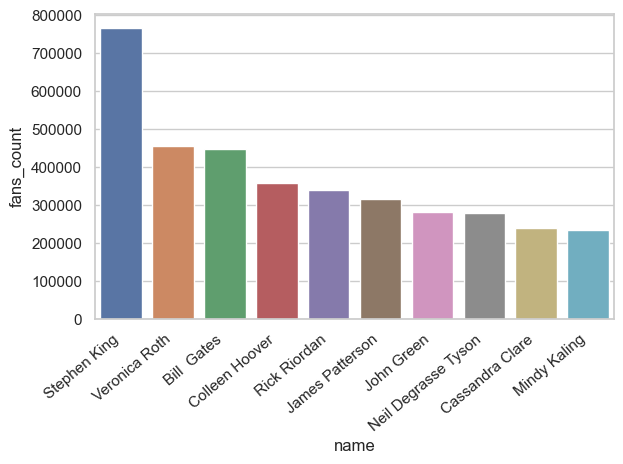

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="name", y="fans_count", data=authors.sort_values('fans_count', ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


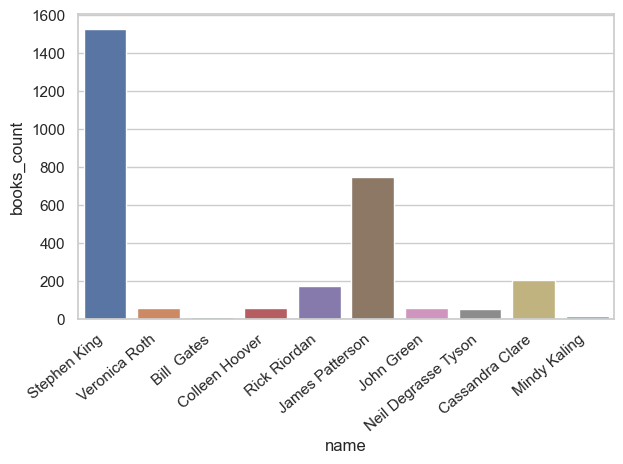

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="name", y="books_count", data=authors.sort_values('fans_count', ascending=False)[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Answer**: Analyzing the graphs above, we can confidently say that Stephen King is the most influential author


### 5.2
Have they published any series of books? If any, extract the longest series name among these authors.


In [469]:
top10_authors = authors.sort_values('fans_count', ascending=False)[['name', 'id', 'fans_count', 'books_count']].head(10)

In [470]:
top10_authors

,name,id,fans_count,books_count
1017,Stephen King,3389,766035,1529
169338,Veronica Roth,4039811,455358,57
6395,Bill Gates,23470,446876,12
205808,Colleen Hoover,5430144,356633,57
4536,Rick Riordan,15872,339346,172
1161,James Patterson,3780,317040,747
100147,John Green,1406384,282537,57
3817,Neil Degrasse Tyson,12855,277850,52
27099,Cassandra Clare,150038,238560,203
32346,Mindy Kaling,194416,234647,16


In [548]:
series = {}
for id in top10_authors.id.values:
    author = top10_authors[top10_authors['id'] == id].name.values[0]
    series[author] = list(set(books[books.author_id == id]['series_name'].dropna().values))

In [472]:
def longest_string(d):
    max_len = 0
    max_str = ''
    for key, values in d.items():
        for series in values:
            if len(series) > max_len:
                longest_series = series
                max_len = len(longest_series)
                author = key
    print(f'Author: {author}, Series: {longest_series}, Length: {max_len}')

longest_string(series)

Author: Rick Riordan, Series: Percy Jackson and the Olympians: The Graphic Novels, Length: 51


**Answer**: Author: Rick Riordan, Series: Percy Jackson and the Olympians: The Graphic Novels, Length: 51

### 5.3
How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

In [546]:
formats = {}
for id in top10_authors.id.values:
    author = top10_authors[top10_authors['id'] == id].name.values[0]
    formats[author] = list(set(books[books.author_id == id]['format'].dropna().values))

In [547]:
import collections
formats_list = []
for author, format in formats.items():
        formats_list.extend(format)

c = collections.Counter(formats_list)

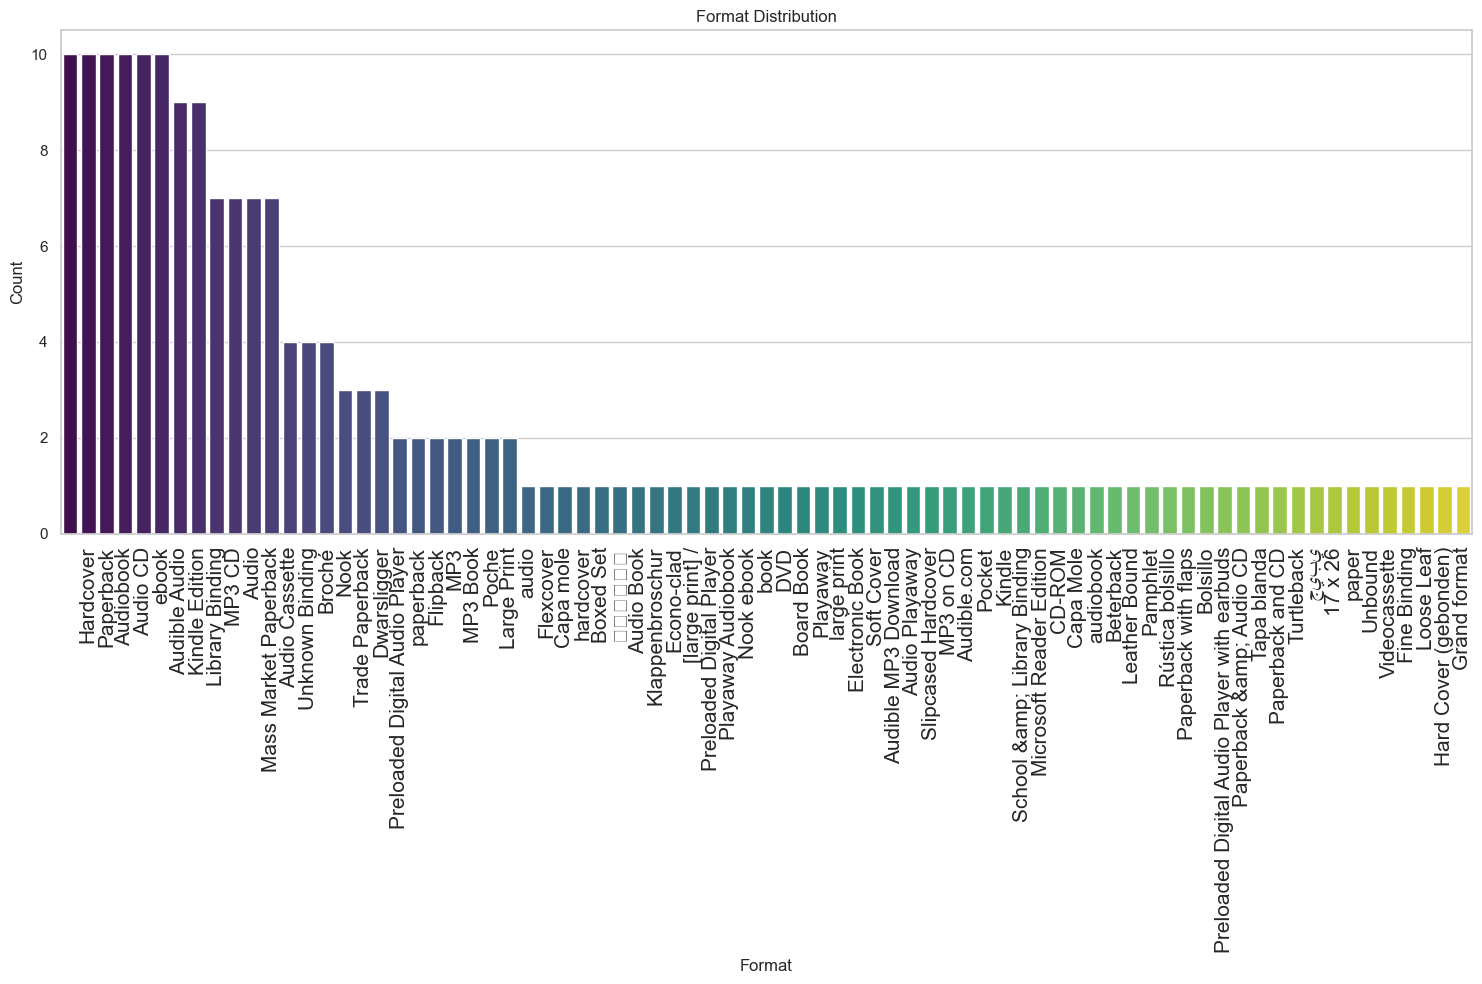

In [475]:
data = {'Format': list(c.keys()), 'Count': list(c.values())}
df = pd.DataFrame(data)
df = df.sort_values('Count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x="Format", y="Count", data=df, palette="viridis")
plt.title("Format Distribution")
plt.xlabel("Format")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize = 15 )
plt.tight_layout()



**Answer:** We can note on the graph, that the most influential authors have been published in different formats. The most common format is ebook, Paperback, Audio CD, Hardcover, Audiobook, Paperback. The least common format is related to Audio formats.

### 5.4
Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

In [476]:
authors = authors.dropna(subset=['gender'])
majorities = authors[(authors['gender'] == 'male') | (authors['gender'] == 'female')]
unknown =  authors[authors['gender'] != '']

In [477]:
unknown.shape

(248367, 13)

In [478]:
majorities.groupby('gender').count()['id']

gender
female    109872
male      138162
Name: id, dtype: int64

In [479]:
stats = majorities.groupby('gender').aggregate({'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'fans_count': 'mean'})
stats


,average_rating,ratings_count,text_reviews_count,fans_count
gender,,,,
female,3.839954,6501.039364,507.020806,180.621159
male,3.606777,5367.668563,303.891142,95.808833


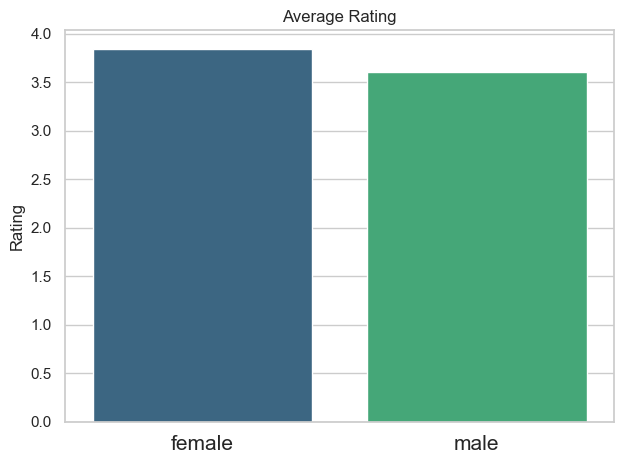

In [480]:
sns.set(style="whitegrid")
sns.barplot(x = stats.index, y = stats['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

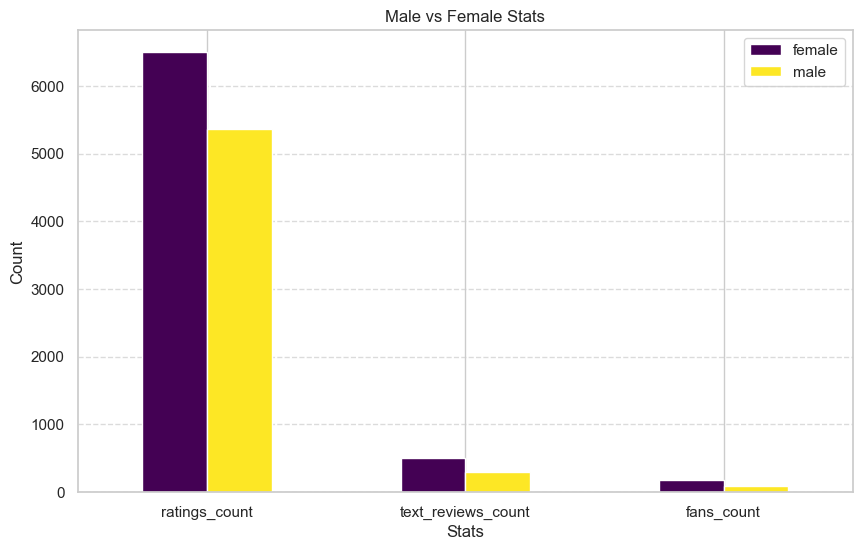

In [484]:
stats_T = stats[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
ax = stats_T.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male vs Female Stats")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here, we can claim that female authors are slightly more popular than male authors. However the data is not balanced as there is difference in count size between male and female authors. Also, we should say that there are 248373 authors with unknown genders, and this is huge number that can affect the results.

We can do downsampling to balance the data. And see what results we will get.

In [485]:
males = authors[authors['gender'] == 'male']
females = authors[authors['gender'] == 'female']
males_sample = males.sample(females.shape[0], random_state=42)
sampled_data = pd.concat([females, males_sample], axis = 0)
stats_2 = sampled_data.groupby('gender').aggregate({'average_rating': 'mean', 'ratings_count': 'mean', 'text_reviews_count': 'mean', 'fans_count': 'mean'})
stats_2

,average_rating,ratings_count,text_reviews_count,fans_count
gender,,,,
female,3.839954,6501.039364,507.020806,180.621159
male,3.606817,5033.282893,289.237576,87.949032


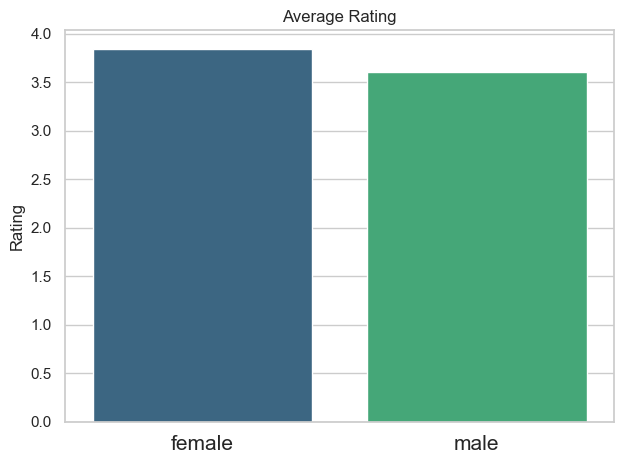

In [486]:
sns.set(style="whitegrid")
sns.barplot(x = stats_2.index, y = stats_2['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

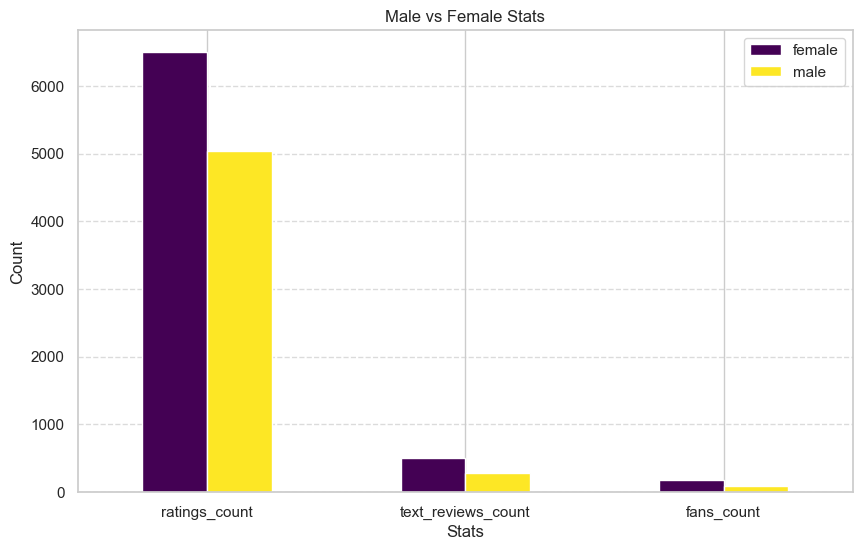

In [487]:
stats_T_2 = stats_2[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
ax = stats_T_2.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male vs Female Stats")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Even after we balanced the data, the main trends of male and female authors on researched metrics still remained the same.
Female authors are slightly more popular than male authors.

In [488]:
minorities = authors[~((authors['gender'] == 'male') | (authors['gender'] == 'female'))]
minorities = minorities[minorities['gender'] != '']
minorities.shape

(333, 13)

In [489]:
minor_stats = minorities.describe().iloc[1, :]

In [490]:
minor_stats = pd.DataFrame(minor_stats).transpose()[['average_rating', 'ratings_count', 'text_reviews_count', 'fans_count']]
minor_stats.set_index(pd.Index(['Minorities']), inplace=True)
total_stats = pd.concat([stats, minor_stats], axis = 0)
total_stats

,average_rating,ratings_count,text_reviews_count,fans_count
female,3.839954,6501.039364,507.020806,180.621159
male,3.606777,5367.668563,303.891142,95.808833
Minorities,3.930300,1357.168168,258.495495,121.204204


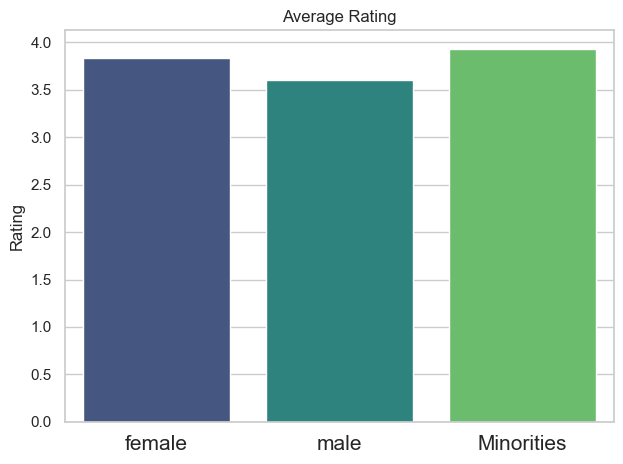

In [491]:
sns.set(style="whitegrid")
sns.barplot(x = total_stats.index, y = total_stats['average_rating'], palette="viridis")
plt.title("Average Rating")
plt.xlabel("")
plt.ylabel("Rating")
plt.xticks(rotation=0, fontsize = 15 )
plt.tight_layout()

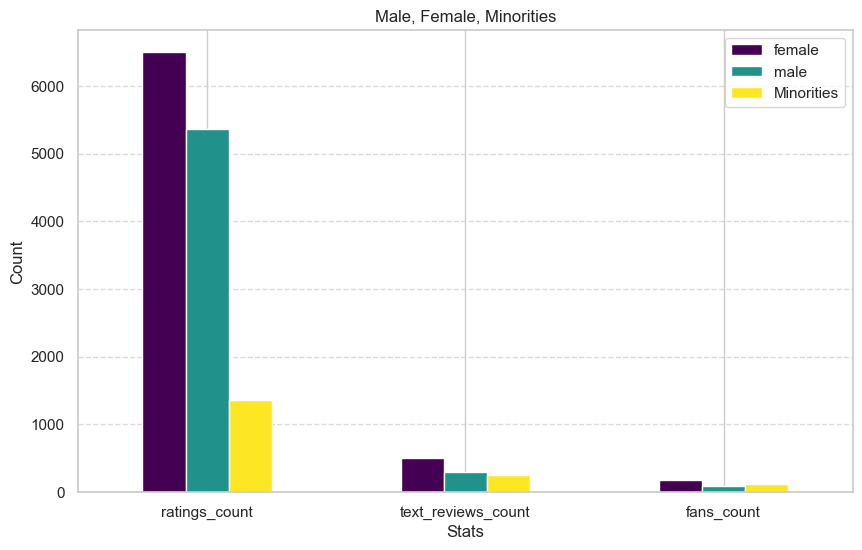

In [ ]:
total_stats_T = total_stats[['ratings_count', 'text_reviews_count', 'fans_count']].transpose()
ax = total_stats_T.plot(kind='bar', rot=0, colormap="viridis", figsize=(10, 6))
plt.title("Male, Female, Minorities")
plt.xlabel("Stats")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It can be noticed, that Minorities have higher average rating that male and female authors. Also, averaged fans count of Minorities is higher than male's fans count. But again the data is not balanced, and the count size of minorities is extremely small (333), so we can't make any conclusions and be confident in them.


## [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

*  Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
*  For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

### 6.1 
Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

I expect to see that the average time gap between two subsequent publications for a series of books is lower than for those not belonging to a series. Because, when author writes a series of books, there is a plan of how many books he/she will write and when to publish them. But when author writes books that don't belong to a series, there is no plan and author writes books with different time gaps.

In [542]:
top10_authors = authors.sort_values('fans_count', ascending=False).head(10)

In [493]:
def pub_data(date):
    date = str(date)
    if len(date) == 4:
        date = date + '-01-01'
    elif len(date) == 7:
        date = date +  '-01'
    elif len(date) != 10:
        return None
    return date

In [494]:
books['publication_date'] = books['publication_date'].apply(lambda x: pub_data(x))

In [495]:
def timedelta_to_years(delta: datetime.timedelta) -> float:
        seconds_in_year = 365.25*24*60*60
        return delta.total_seconds() / seconds_in_year

In [526]:
def series_time_gap(author_id: int):
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')
    books_author = books_author.dropna(subset=['publication_date'])
    books_author_series = books_author[(books_author['series_name'].notna()) & (books_author['series_position'] != '')]
    series = books_author_series['series_name'].unique()

    if len(series) == 0:
        return None
    df_series = []

    for serie in series:
        books_author_serie = books_author_series[books_author_series['series_name'] == serie].copy()
        books_author_serie['publication_date'] = pd.to_datetime(books_author_serie['publication_date'], format='%Y-%m-%d')
        books_author_serie = books_author_serie.sort_values('publication_date', ascending=True)

        books_author_serie = books_author_serie.drop_duplicates(subset=['series_position'], keep='first')

        books_author_serie['time_gap'] = books_author_serie.groupby('series_name')['publication_date'].diff()
        

        books_author_serie = books_author_serie.dropna(subset = ['time_gap'])
        books_author_serie = books_author_serie[books_author_serie['time_gap'] != '0 days']
        df_series.append(books_author_serie)

    result_df = pd.concat(df_series, axis=0, ignore_index=True)

    if result_df.shape[0] == 0:
        return None

    mean_time_gap = result_df['time_gap'].mean()
    years_mean = timedelta_to_years(mean_time_gap)
    return round(years_mean, 2)

In [527]:
def not_series_time_gap(author_id: int):
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()
    

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')

    books_author = books_author.dropna(subset=['publication_date'])


    books_not_in_series = books_author[(books_author['series_name'].isna()) | (books_author['series_name'] == '')].copy()

    books_not_in_series['publication_date'] = pd.to_datetime(books_not_in_series['publication_date'], format='%Y-%m-%d')
    books_not_in_series = books_not_in_series.sort_values('publication_date', ascending=True)

    books_not_in_series['time_gap'] = books_not_in_series['publication_date'].diff()

    books_not_in_series = books_not_in_series.dropna(subset=['time_gap'])
    books_not_in_series = books_not_in_series[books_not_in_series['time_gap'] != '0 days']

    if books_not_in_series.shape[0] == 0:
        return None

    mean_time_gap = books_not_in_series['time_gap'].mean()
    years_mean = timedelta_to_years(mean_time_gap)
    return round(years_mean, 2)

not_series_time_gap(3389)

0.61

In [528]:
total_time_gap = {}
for id in tqdm(top10_authors.id.values):
    name = top10_authors[top10_authors['id'] == id].name.values[0]
    total_time_gap[name] = [series_time_gap(id), not_series_time_gap(id)]


100%|██████████| 10/10 [03:11<00:00, 19.13s/it]


In [529]:
total_time_gap_df = pd.DataFrame(total_time_gap).transpose().rename(columns={0: 'Series', 1: 'Not in Series'})
total_time_gap_df

,Series,Not in Series
Stephen King,6.53,0.61
Veronica Roth,0.80,NaN
Bill Gates,NaN,3.25
Colleen Hoover,NaN,0.23
Rick Riordan,1.01,NaN
James Patterson,1.14,0.99
John Green,NaN,2.10
Neil Degrasse Tyson,NaN,4.06
Cassandra Clare,1.32,NaN
Mindy Kaling,NaN,3.87


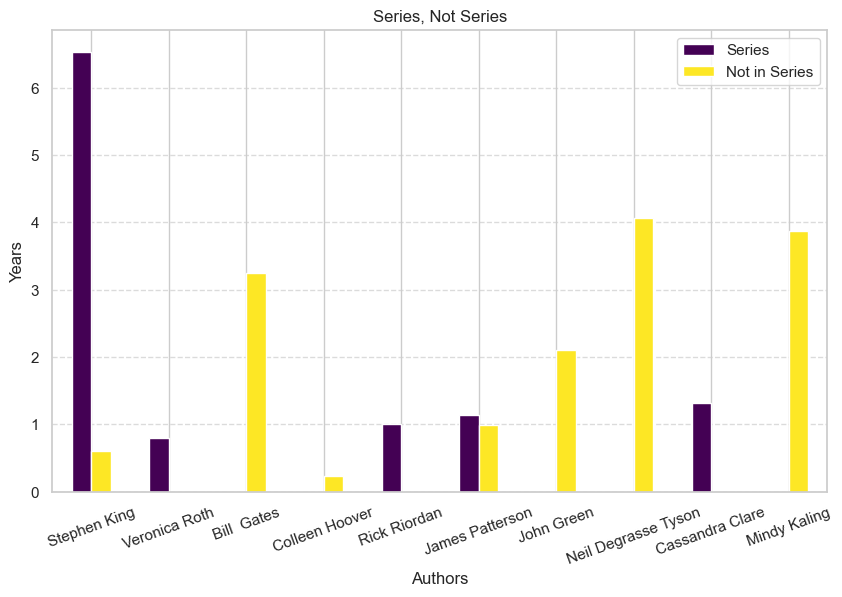

In [530]:
ax = total_time_gap_df.plot(kind='bar', rot=20, colormap="viridis", figsize=(10, 6))
plt.title("Series, Not Series")
plt.xlabel("Authors")
plt.ylabel("Years")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [532]:
total_series_mean = total_time_gap_df['Series'].mean()
total_not_series_mean = total_time_gap_df['Not in Series'].mean()

print(f'Total series time gap mean(years): {round(total_series_mean, 3)}' + '\n' + f'Total not series time gap mean(years): {round(total_not_series_mean, 3)}')


Total series time gap mean(years): 2.16
Total not series time gap mean(years): 2.159


We can say that the mean time gap for both series books and not series book are the almost the same.

There are too many Nones in the dataset, so we can't make any conclusions about the average time gap between two subsequent publications for a series of books and those not belonging to a series for top 10 authors. These None values means that some authors don'h have any series of books or books that are not part of a series. Also, it can be that some books were filtered out during the data cleaning process, as they have inappropriate values in the publication year column.


However, for better understanding of the data, we can take only those authors who have series of books and books that are not part of a series.

In [533]:
top40_authors = authors.sort_values('fans_count', ascending=False).head(40)


In [535]:
total_time_gap_40 = {}
for id in tqdm(top40_authors.id.values):
    name = top40_authors[top40_authors['id'] == id].name.values[0]
    total_time_gap_40[name] = [series_time_gap(id), not_series_time_gap(id)]

total_time_gap_40

100%|██████████| 40/40 [1:08:49<00:00, 103.25s/it]  


{'Stephen King': [6.53, 0.61],
 'Veronica Roth': [0.8, None],
 'Bill  Gates': [None, 3.25],
 'Colleen Hoover': [None, 0.23],
 'Rick Riordan': [1.01, None],
 'James Patterson': [1.14, 0.99],
 'John Green': [None, 2.1],
 'Neil Degrasse Tyson': [None, 4.06],
 'Cassandra Clare': [1.32, None],
 'Mindy Kaling': [None, 3.87],
 'Patrick Rothfuss': [2.86, None],
 'J.k. Rowling': [0.86, 5.76],
 'Nicholas Sparks': [4.91, 1.27],
 'Diana Gabaldon': [4.23, None],
 'Sarah J. Maas': [0.77, None],
 'Wil Wheaton': [None, None],
 'Brandon Sanderson': [2.27, 4.5],
 'Maggie Stiefvater': [1.67, None],
 'Kristin Hannah': [None, 1.77],
 'Khaled Hosseini': [None, 2.99],
 'Rainbow Rowell': [None, 0.45],
 'Felicia Day': [None, 2.04],
 'Roxane Gay': [None, 0.31],
 'Chuck Palahniuk': [1.97, 1.62],
 'Marie Lu': [0.98, None],
 'Paulo Coelho': [2.38, 1.28],
 'Lauren Oliver': [1.04, 1.72],
 'Sylvia Day': [0.48, None],
 'David Baldacci': [1.58, 1.96],
 'L.j. Smith': [2.65, None],
 'Marissa Meyer': [0.96, None],
 'Mitch

In [536]:
total_time_gap_40_df = pd.DataFrame(total_time_gap_40).transpose().rename(columns={0: 'Series', 1: 'Not in Series'})

total_time_gap_40_df.dropna(inplace=True)

In [537]:
total_time_gap_10_df = total_time_gap_40_df[:10]

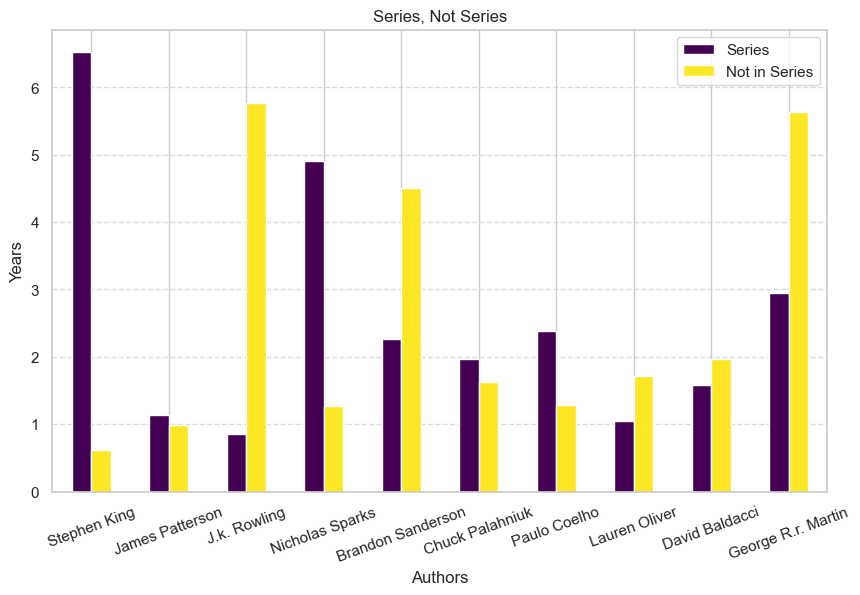

In [538]:
ax = total_time_gap_10_df.plot(kind='bar', rot=20, colormap="viridis", figsize=(10, 6))
plt.title("Series, Not Series")
plt.xlabel("Authors")
plt.ylabel("Years")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [539]:
total_series_mean = total_time_gap_10_df['Series'].mean()
total_not_series_mean = total_time_gap_10_df['Not in Series'].mean()

print(f'Total series time gap mean(years): {round(total_series_mean, 3)}' + '\n' + f'Total not series time gap mean(years): {total_not_series_mean}')


Total series time gap mean(years): 2.562
Total not series time gap mean(years): 2.534


Here we can see that  the mean time gap for series books is slightly higher than for not series books and  our expectations were wrong. However, Stephen King has the highest mean time gap for series books, and this is the reason why the mean time gap for series books is higher than for not series books.If we will remove Stephen King from the dataset, we will see that the mean time gap for series books is lower than mean time gap for not series books.

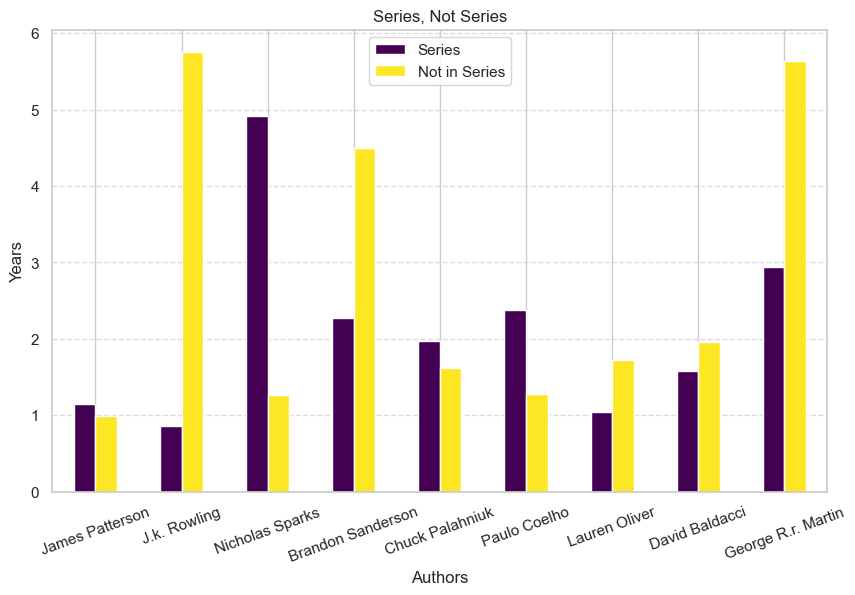

In [543]:
ax = total_time_gap_10_df[1:].plot(kind='bar', rot=20, colormap="viridis", figsize=(10, 6))
plt.title("Series, Not Series")
plt.xlabel("Authors")
plt.ylabel("Years")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [545]:
total_series_mean = total_time_gap_10_df[1:]['Series'].mean()
total_not_series_mean = total_time_gap_10_df[1:]['Not in Series'].mean()

print(f'Total series time gap mean(years): {round(total_series_mean, 3)}' + '\n' + f'Total not series time gap mean(years): {round(total_not_series_mean,3)}')


Total series time gap mean(years): 2.121
Total not series time gap mean(years): 2.748


As we expected, removing Stephen King from the dataset, we can see that the mean time gap for series books is lower than mean time gap for not series books. So partially our expectations were right.

### 6.2
For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [540]:
def plot_books_published(author_id):
    books_author = books[(books['author_id'] == author_id) & 
                        (books['format'] == 'Hardcover') & 
                        (books['language'] == 'eng')].copy()

    books_author = books_author.drop_duplicates(subset=['title'], keep='first')

    books_author = books_author.dropna(subset=['publication_date'])

    books_author['publication_date'] = pd.to_datetime(books_author['publication_date'], format='%Y-%m-%d')
    books_author = books_author.sort_values('publication_date', ascending=True)

    books_author['year'] = books_author['publication_date'].dt.year

    books_author['year'].value_counts().sort_index().plot(kind='bar', rot=45, colormap="viridis", figsize=(10, 6))
    plt.title(f"{books_author.author_name.values[0]}:Books Published")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

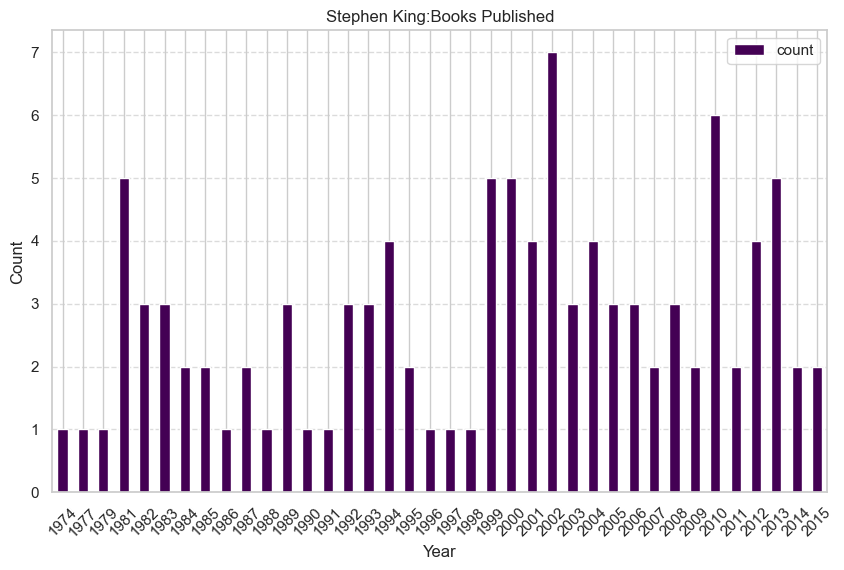

 10%|█         | 1/10 [00:10<01:33, 10.39s/it]

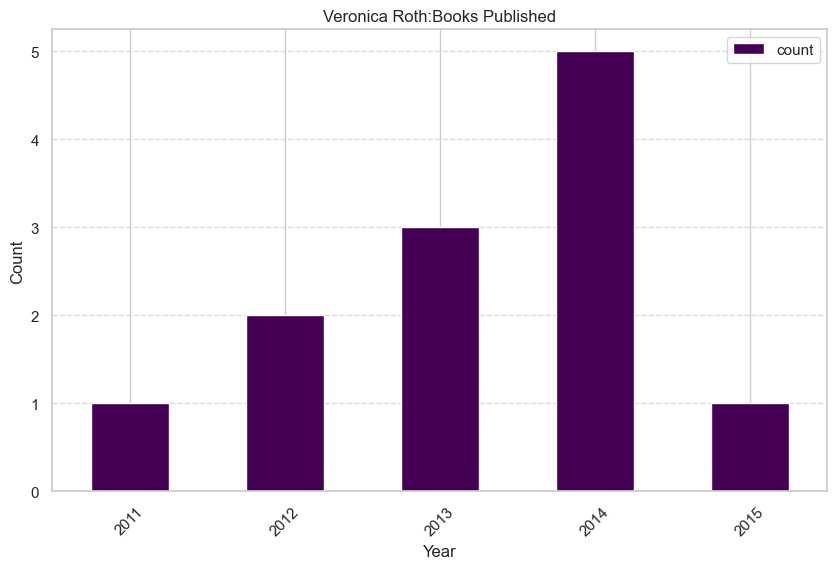

 20%|██        | 2/10 [00:20<01:22, 10.32s/it]

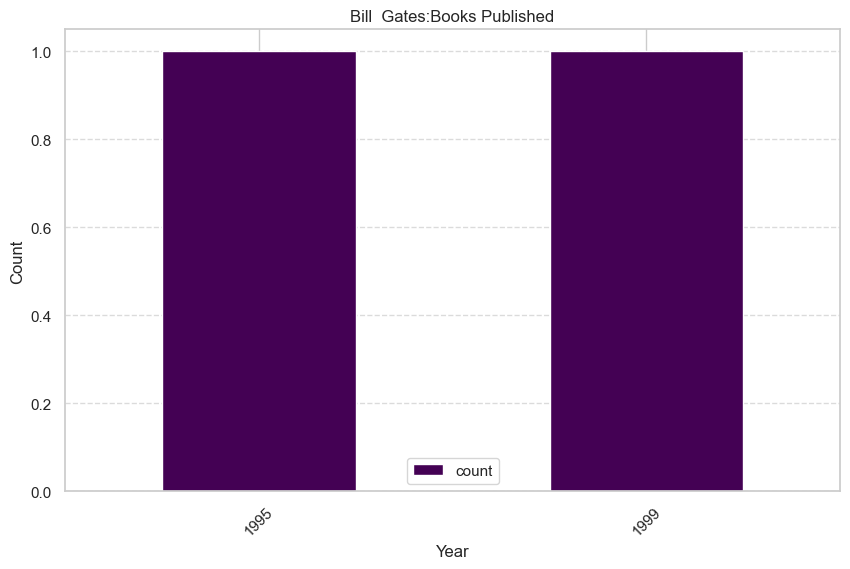

 30%|███       | 3/10 [00:30<01:12, 10.31s/it]

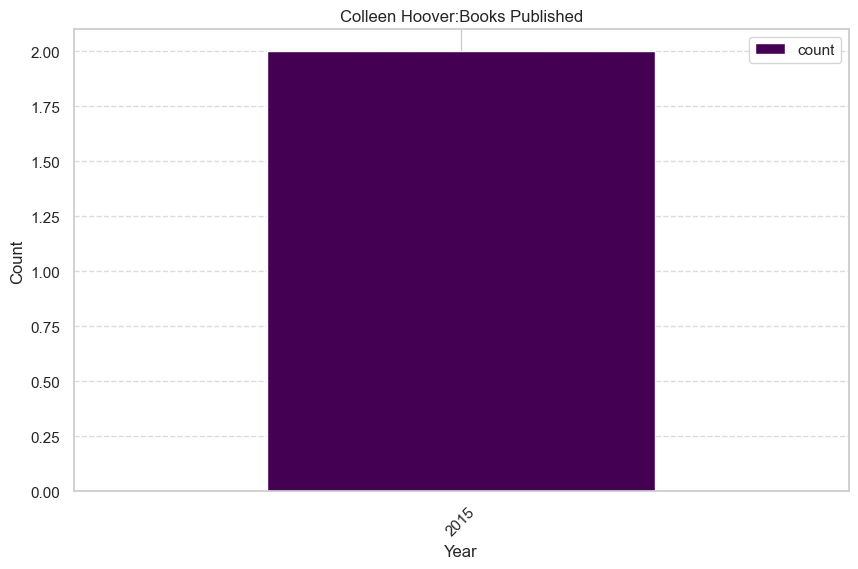

 40%|████      | 4/10 [00:41<01:02, 10.39s/it]

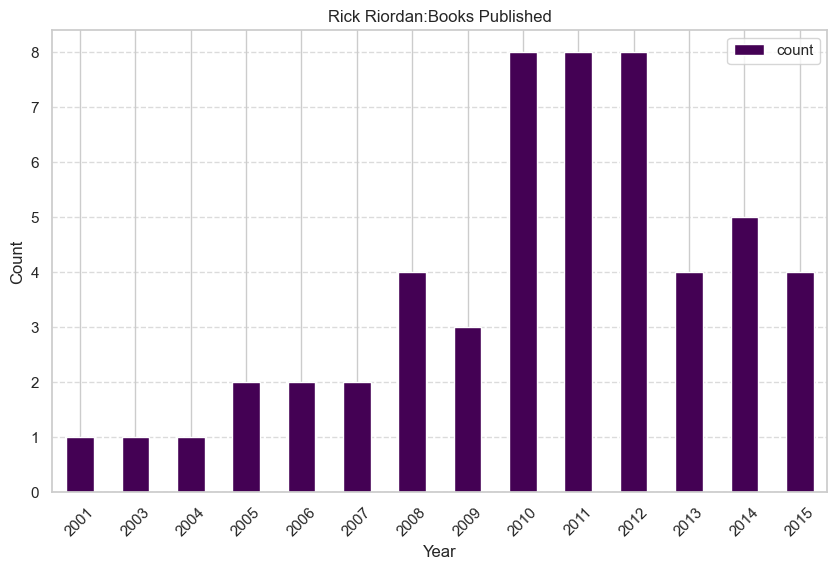

 50%|█████     | 5/10 [00:51<00:52, 10.42s/it]

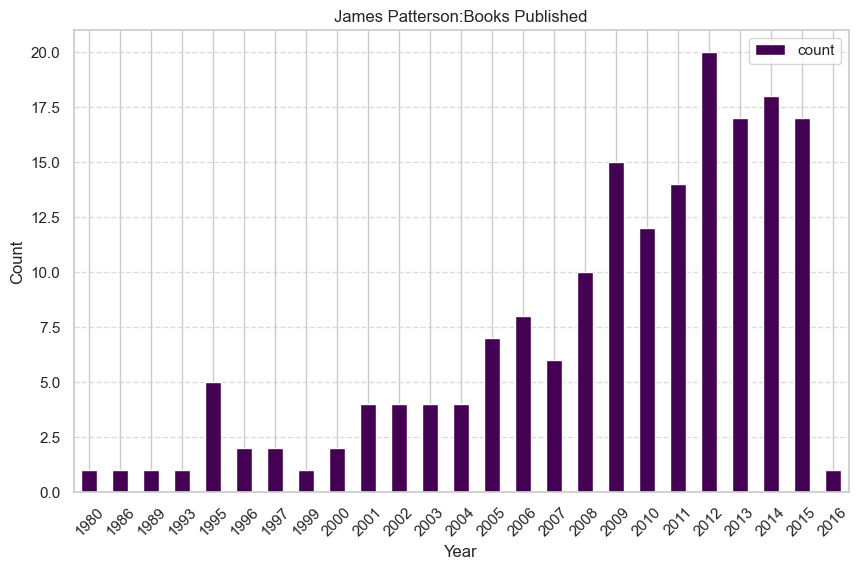

 60%|██████    | 6/10 [01:02<00:42, 10.53s/it]

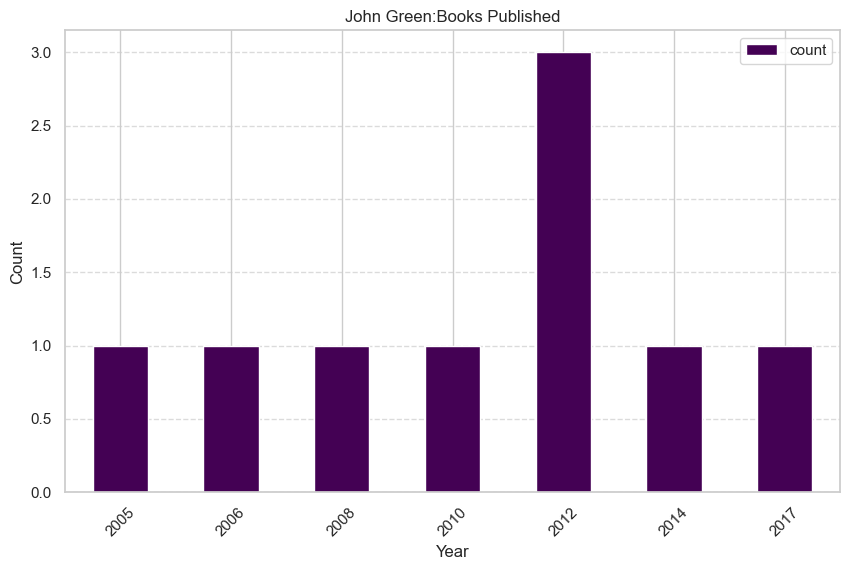

 70%|███████   | 7/10 [01:13<00:31, 10.55s/it]

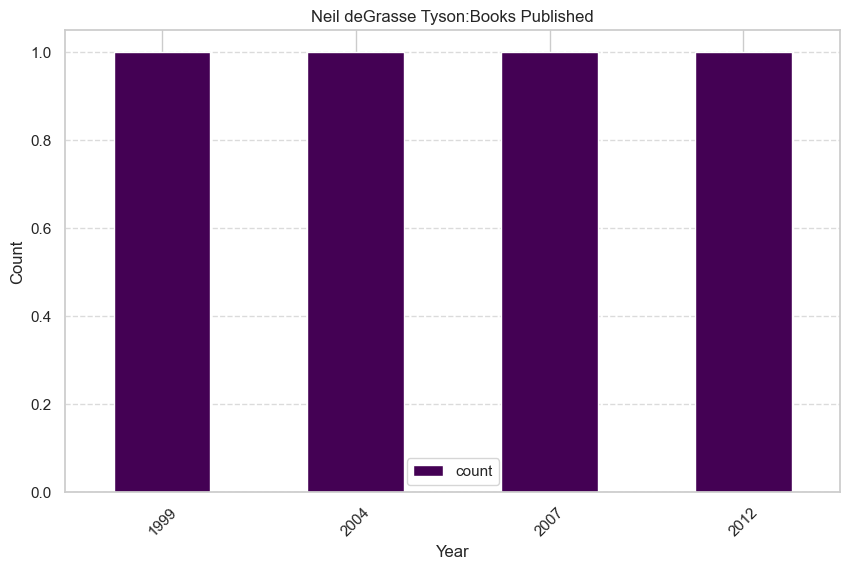

 80%|████████  | 8/10 [01:23<00:20, 10.50s/it]

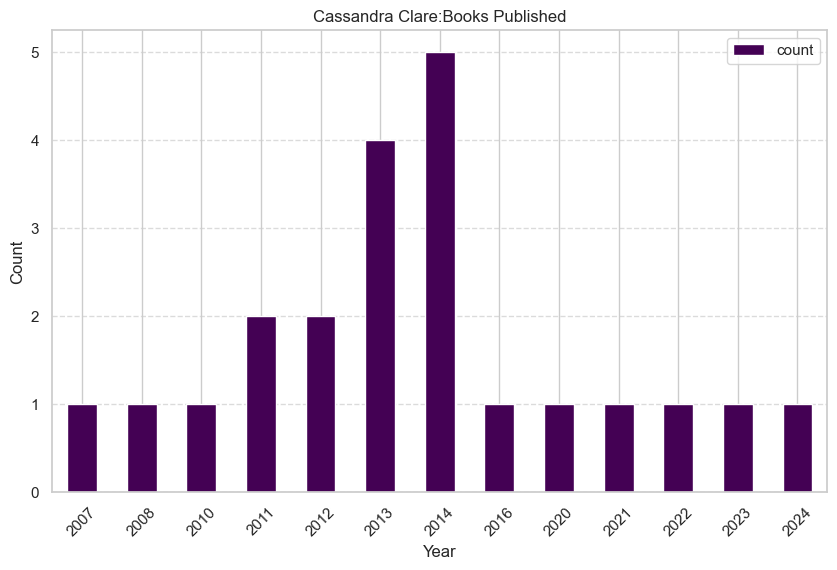

 90%|█████████ | 9/10 [01:33<00:10, 10.42s/it]

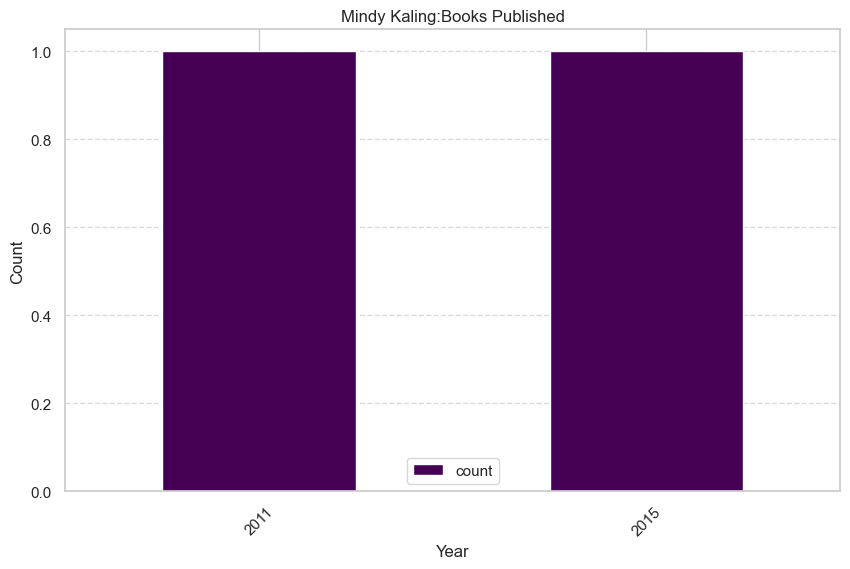

100%|██████████| 10/10 [01:44<00:00, 10.43s/it]


In [541]:
for id in tqdm(top10_authors.id.values):
    plot_books_published(id)

We can notice that the authors are not contemporary with each other. The production rate of each author is different. Stephen King has the highest production rate, and he has published more than 100 books. The production rate of other authors is much lower. Also, we can notice that the production rate for Rick Riordan and James Patterson started to increase every year after 2009. Authors like Mindy Kalling, Neil DeGrasse Tyson and Bill Gates have a large time gap in their production rate and these authors with Colleen Hoover have published less than 5 books.
Cassandra Clare has a spike in her production rate between 2011 and 2014, and after 2014 her production rate stayed as 1 book per year.
Overall, we can say that the production rate of authors is different and it depends on the author.